In [10]:
import matplotlib.pyplot as plt
import numpy as np
from diffusionProcess import DiffusionProcess, drift, sigma, generate_linear_drift
from strategies import DataDrivenImpulseControl, generate_reward_func, OptimalStrategy
plt.style.use(r"C:\Users\razz_\AppData\Local\Programs\Python\Python310\Lib\site-packages\matplotlib\mpl-data\stylelib\theme_bw.mplstyle")

The idea of this document is to see how it will affect the simulation, when we use data from the exploitation periods to estimate the invariant density, the invariant distribution function and the optimal threshold. We will try using all of the exploitation data, but we will also see how it would affect the simulation if the exploitation data only accounts for a percentage of all the data used when estimating.

# Checking the effect on the invariant density

In [77]:
Cs = [0.1, 0.5, 2, 4]
fData = []
trueDens = []
valsUsed = []
for c in Cs:
    b = generate_linear_drift(c, 0)
    r = generate_reward_func(1, 0.9)

    diffProcess = DiffusionProcess(b, sigma)
    #optStrat = OptimalStrategy(diffProcess, r)
    dataStrat = DataDrivenImpulseControl(r, sigma)

    T = 5000
    exploration_data, exploitation_data = dataStrat.get_exploration_and_exploitation_data(diffpros=diffProcess, T=T, dt=0.01)

    lim = 5 if c == 0.1 else (3 if c == 0.5 else (1.5 if c == 2 else 1))
    vals = np.linspace(-lim, lim, 200)
    valsUsed.append(vals)
    dens = [diffProcess.invariant_density(v) for v in vals]
    trueDens.append(dens)

    alphas = [0, 0.1, 0.25, 0.50]
    alpha_data = []

    for alpha in alphas:
        if alpha == "all":
            data = exploration_data + exploitation_data
        else:
            data = exploration_data + exploitation_data[-(round(len(exploration_data)/(1/alpha - 1))):] if alpha != 0 else exploration_data
        dataStrat.bandwidth = 1/np.sqrt(len(data)*0.01)
        #dataStrat.bandwidth = 1/np.sqrt(T)
        dataStrat.fit(data)
        fs = [dataStrat.pdf_eval(v) for v in vals]
        alpha_data.append(fs)
    
    fData.append(alpha_data)

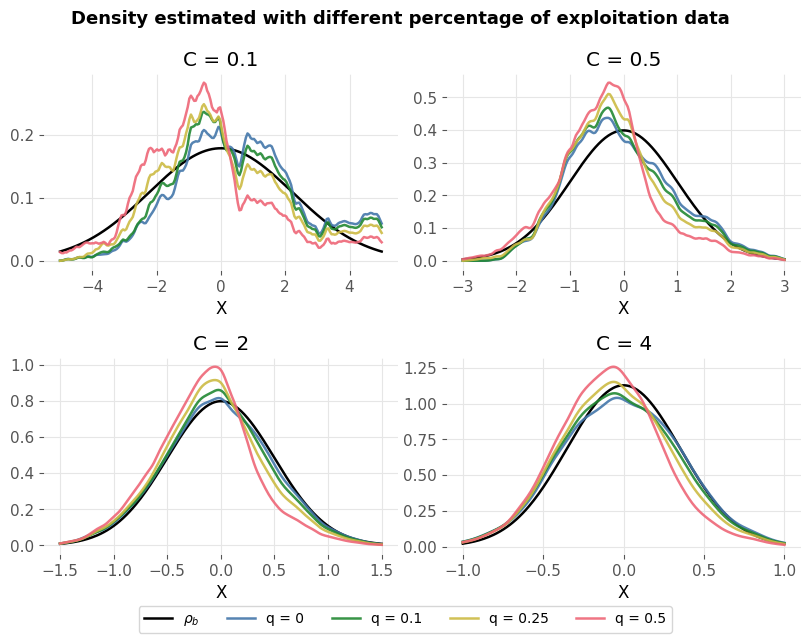

In [87]:
colors = ["#000000", "#4477AA", "#228833", "#CCBB44", "#EE6677"]
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(8.3, 6.4))
figLabels = [r"$\rho_b$"] + [f"q = {alpha}" for alpha in alphas]
for i, c in enumerate(Cs):
    axes[i//2][i%2].plot(valsUsed[i], trueDens[i], label=figLabels[0], color=colors[0],linewidth=1.8)
    for j, alpha in enumerate(alphas):
        axes[i//2][i%2].plot(valsUsed[i], fData[i][j], label=figLabels[j+1], color=colors[j+1], alpha=0.9,linewidth=1.8)
    #axes[i//2][i%2].legend()
    axes[i//2][i%2].set_title(f"C = {str(c)}")
    axes[i//2][i%2].set_xlabel("X")
    axes[i//2][i%2].tick_params(axis='both', which='major', labelsize=11)
    axes[i//2][i%2].tick_params(axis='both', which='minor', labelsize=11)


fig.tight_layout()
fig.subplots_adjust(top=0.88, bottom=0.13, hspace=0.45)
fig.suptitle("Density estimated with different percentage of exploitation data", fontsize=13, fontweight="bold")
fig.legend(labels=figLabels, loc="lower center", ncol=5)
#plt.savefig(r'C:\Users\razz_\OneDrive - Aarhus Universitet\UNI\DataVidenskab\10. Semester\Images\ExploitationData\InvariantDensities.pdf')
plt.show()

In [91]:
Cs = [0.1, 0.5, 2, 4]
fData = []
trueDens = []
valsUsed = []
for c in Cs:
    b = generate_linear_drift(c, 0)
    r = generate_reward_func(1, 0.9)

    diffProcess = DiffusionProcess(b, sigma)
    #optStrat = OptimalStrategy(diffProcess, r)
    dataStrat = DataDrivenImpulseControl(r, sigma)

    T = 5000
    exploration_data, exploitation_data = dataStrat.get_exploration_and_exploitation_data(diffpros=diffProcess, T=T, dt=0.01)

    lim = 4 if c == 0.1 else (2 if c == 0.5 else (1 if c == 2 else 0.75))
    vals = np.linspace(-lim, lim, 200)
    valsUsed.append(vals)
    dens = [diffProcess.invariant_distribution(v) for v in vals]
    trueDens.append(dens)

    alphas = [0, 0.1, 0.25, 0.50]
    alpha_data = []

    for alpha in alphas:
        if alpha == "all":
            data = exploration_data + exploitation_data
        else:
            data = exploration_data + exploitation_data[-(round(len(exploration_data)/(1/alpha - 1))):] if alpha != 0 else exploration_data
        dataStrat.bandwidth = 1/np.sqrt(len(data)*0.01)
        dataStrat.fit(data)
        fs = [dataStrat.cdf_eval(v) for v in vals]
        alpha_data.append(fs)
    
    fData.append(alpha_data)

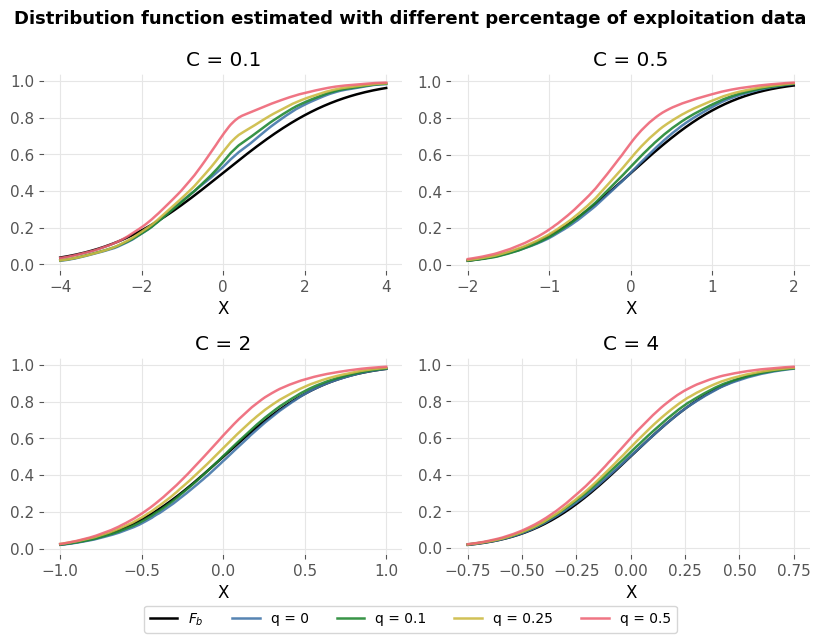

In [92]:
colors = ["#000000", "#4477AA", "#228833", "#CCBB44", "#EE6677"]
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(8.3, 6.4))
figLabels = [r"$F_b$"] + [f"q = {alpha}" for alpha in alphas]
for i, c in enumerate(Cs):
    axes[i//2][i%2].plot(valsUsed[i], trueDens[i], label=figLabels[0], color=colors[0],linewidth=1.8)
    for j, alpha in enumerate(alphas):
        axes[i//2][i%2].plot(valsUsed[i], fData[i][j], label=figLabels[j+1], color=colors[j+1], alpha=0.9,linewidth=1.8)
    #axes[i//2][i%2].legend()
    axes[i//2][i%2].set_title(f"C = {str(c)}")
    axes[i//2][i%2].set_xlabel("X")
    axes[i//2][i%2].tick_params(axis='both', which='major', labelsize=11)
    axes[i//2][i%2].tick_params(axis='both', which='minor', labelsize=11)


fig.tight_layout()
fig.subplots_adjust(top=0.88, bottom=0.13, hspace=0.45)
fig.suptitle("Distribution function estimated with different percentage of exploitation data", fontsize=13, fontweight="bold")
fig.legend(labels=figLabels, loc="lower center", ncol=5)
#plt.savefig(r'C:\Users\razz_\OneDrive - Aarhus Universitet\UNI\DataVidenskab\10. Semester\Images\ExploitationData\InvariantDistributionFunc.pdf')
plt.show()

In [3]:
b = generate_linear_drift(0.5, 0)
r = generate_reward_func(1, 0.9)

diffProcess = DiffusionProcess(b, sigma)
#optStrat = OptimalStrategy(diffProcess, r)
dataStrat = DataDrivenImpulseControl(r, sigma)

expo_data, exploi_data = dataStrat.get_exploration_and_exploitation_data(diffpros=diffProcess, T=5000, dt=0.01)

print(len(expo_data))
print(len(exploi_data))

29661
470384
